In [5]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from pprint import pprint

ModuleNotFoundError: No module named 'fancyimpute'

# 1. Daten einlesen

### (a) Lies die Daten aus dem beigelegten Excel-File ’diabetes.xlsx’ ein. Lies dazu auch die beigefügte Beschreibung der einzelnen Merkmale und versuche diese ganz grob zu verstehen.

In [ ]:
df_0 = pd.read_excel('diabetes.xlsx')

In [ ]:
df_0.head()

,Diese Datei enthält Daten zum erhöhten Diabetes-Risiko eines Eingeborenenstammes. Dabei wurden 767 Frauen über 21 befragt und auf verschiedene Merkmale getestet.,Unnamed: 1
0,Das Datenset soll zur Modellierung des Diabete...,NaN
1,NaN,NaN
2,Merkmal,Erklärung
3,n_pregnant,Anzahl durchgangene Schwangerschaften
4,gtt,Resultat des Glukose-Toleranz-Tests (GTT): Pla...


In [ ]:
for count, i in enumerate(df_0.values):
    if count < 2:
        continue
    else:
        print(i)

['Merkmal' 'Erklärung']
['n_pregnant' 'Anzahl durchgangene Schwangerschaften']
['gtt'
 'Resultat des Glukose-Toleranz-Tests (GTT): Plasma-Glukose-Konzentration 2 Stunden nach Verabreichung einer Zuckerlösung (mmol/L)']
['blood_pressure' 'Diastolischer Blutdruck (mm Hg)']
['triceps_skin_fold_thickness'
 'Dicke einer Triceps-Hautfalte, die zur Bestimmung des Körperfettanteils eingesetzt wird (mm)']
['insulin'
 'Insulin-Konzentration 2 Stunden nach Verabreichung einer Zuckerlösung (μU/ml)']
['bmi' 'Body-Mass-Index: Gewicht in kg / (Grösse in m)^2']
['dpf'
 'diabetes pedigree function – Grösse zum Diabetesrisiko aus Diabetes-Fallgeschichte der Vorfahren']
['age' 'Alter in Jahren']
['class' 'Zugewiesene Klasse (0 kein Diabetes, 1 Diabetes)']


In [ ]:
df = pd.read_excel('diabetes.xlsx', sheet_name='data')

In [ ]:
df.head()

,Datensatz:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
head = df.iloc[1].values
head

array(['n_pregnant', 'gtt', 'blood_pressure',
       'triceps_skin_fold_thickness', 'insulin', 'bmi', 'dpf', 'age',
       'class'], dtype=object)

In [ ]:
df.iloc[2:]

,Datensatz:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
values = df.iloc[2:].values
values

array([[1, 85, 66, ..., 0.351, 31, 0],
       [8, 183, 64, ..., 0.672, 32, 1],
       [1, 89, 66, ..., 0.167, 21, 0],
       ...,
       [5, 121, 72, ..., 0.245, 30, 0],
       [1, 126, 60, ..., 0.349, 47, 1],
       [1, 93, 70, ..., 0.315, 23, 0]], dtype=object)

In [ ]:
df = pd.DataFrame(values, columns=head)
df.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### (b) Welche Merkmale sind diskret, welche stetig? Handelt es sich konkret um nominal-, ordinal-, intervall oder verhältnisskalierte Merkmale?
### Ein Merkmal gilt dann als diskret, wenn es nur abzählbar viele Ausprägungen annehmen kann. In der Praxis bedeutet dies meist, dass die Anzahl der möglichen Ausprägungen endlich ist. Dies ist etwa bei Schulnoten etc..

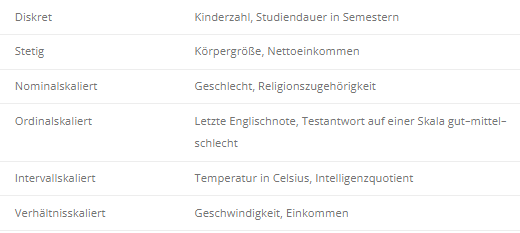

# 2. Exploration

### (a) Untersuche zuerst die Verteilungen der einzelnen Merkmale, jedes für sich. Gibt es auffällige Werte, die auf Datenfehler, Ausreisser oder fehlende Werte hinweisen?

In [ ]:
for count, i in enumerate(df_0.values):
    if count < 2:
        continue
    else:
        print(i)

['Merkmal' 'Erklärung']
['n_pregnant' 'Anzahl durchgangene Schwangerschaften']
['gtt'
 'Resultat des Glukose-Toleranz-Tests (GTT): Plasma-Glukose-Konzentration 2 Stunden nach Verabreichung einer Zuckerlösung (mmol/L)']
['blood_pressure' 'Diastolischer Blutdruck (mm Hg)']
['triceps_skin_fold_thickness'
 'Dicke einer Triceps-Hautfalte, die zur Bestimmung des Körperfettanteils eingesetzt wird (mm)']
['insulin'
 'Insulin-Konzentration 2 Stunden nach Verabreichung einer Zuckerlösung (μU/ml)']
['bmi' 'Body-Mass-Index: Gewicht in kg / (Grösse in m)^2']
['dpf'
 'diabetes pedigree function – Grösse zum Diabetesrisiko aus Diabetes-Fallgeschichte der Vorfahren']
['age' 'Alter in Jahren']
['class' 'Zugewiesene Klasse (0 kein Diabetes, 1 Diabetes)']


In [ ]:
df.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df = df.astype('float')

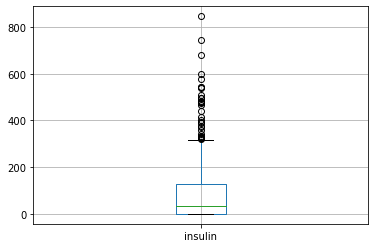

In [ ]:
boxplot = df.boxplot(column=['insulin'])

### (b) Stelle sicher, dass alle fehlenden Werte sauber mit ‘NaN‘ markiert sind und stelle die Verteilung der einzelnen Merkmale danach noch einmal graphisch mit Histogrammen dar.

In [ ]:
#histogramm = df.hist(column=['gtt'])

In [ ]:
#scatter = df.reset_index().plot.scatter(x='age', y='gtt')

<AxesSubplot:xlabel='triceps_skin_fold_thickness', ylabel='Count'>

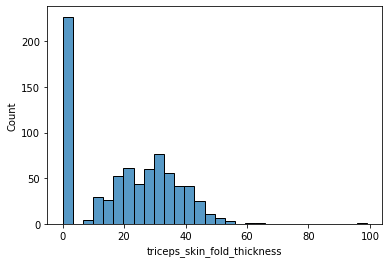

In [ ]:
sns.histplot(data = df, x = "triceps_skin_fold_thickness", bins=30)

In [ ]:
# Replace zero to nan to prevent falsification
columns = df.columns.to_list()
columns = [x for x in columns if x != "class" if x != "n_pregnant"]
df[columns] = df[columns].replace({0:np.nan})
columns

['gtt',
 'blood_pressure',
 'triceps_skin_fold_thickness',
 'insulin',
 'bmi',
 'dpf',
 'age']

<AxesSubplot:xlabel='triceps_skin_fold_thickness', ylabel='Count'>

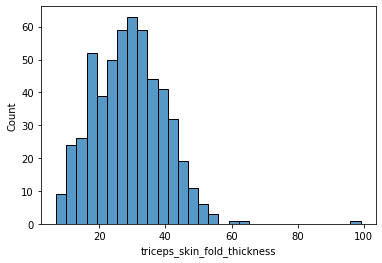

In [ ]:
sns.histplot(data = df, x = "triceps_skin_fold_thickness", bins=30)

### c) Wie hängen die Merkmale mit der Zielvariable ’class’ zusammen? Fallen dir Merkmale auf, die bereits klare Hinweise auf das Diabetesrisiko geben? Benutze eine geeignete graphische Darstellung.

In [ ]:
df_class_1 = df[df["class"] == 1]
df_class_0 = df[df["class"] != 1]

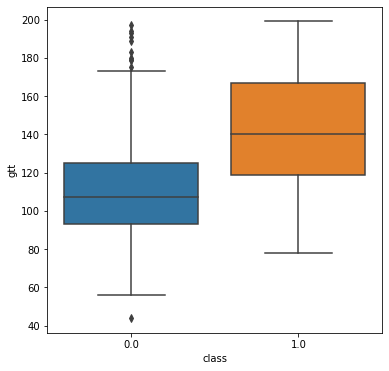

In [ ]:
# Achte auf symmetrie bei der Verteilung, und geniesse mit Vorsicht..
plt.figure(figsize=(6,6))
sns.boxplot(data = df, x = "class", y = "gtt")
plt.show()

<AxesSubplot:xlabel='gtt', ylabel='Count'>

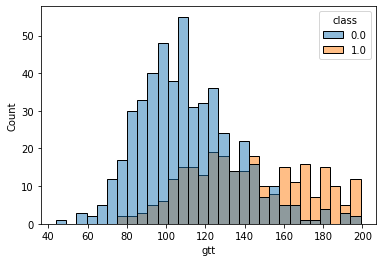

In [ ]:
sns.histplot(data = df, x = "gtt", hue="class", alpha=0.5, bins=30)

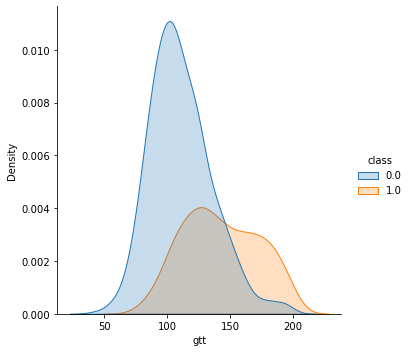

In [ ]:
# Wie gut sind meine Daten für die Vorhersage der Klasse
sns.displot(data = df, x = "gtt", hue="class", kind="kde", fill=True)

### (d) Gibt es Merkmale, die untereinander stark korrelieren? Visualisiere dazu die Daten mit einer Scatter Matrix und berechne die Korrelationsmatrix. Hinweis: Die Zielvariable ’class’ muss bei dieser Analyse nicht mehr vorkommen.

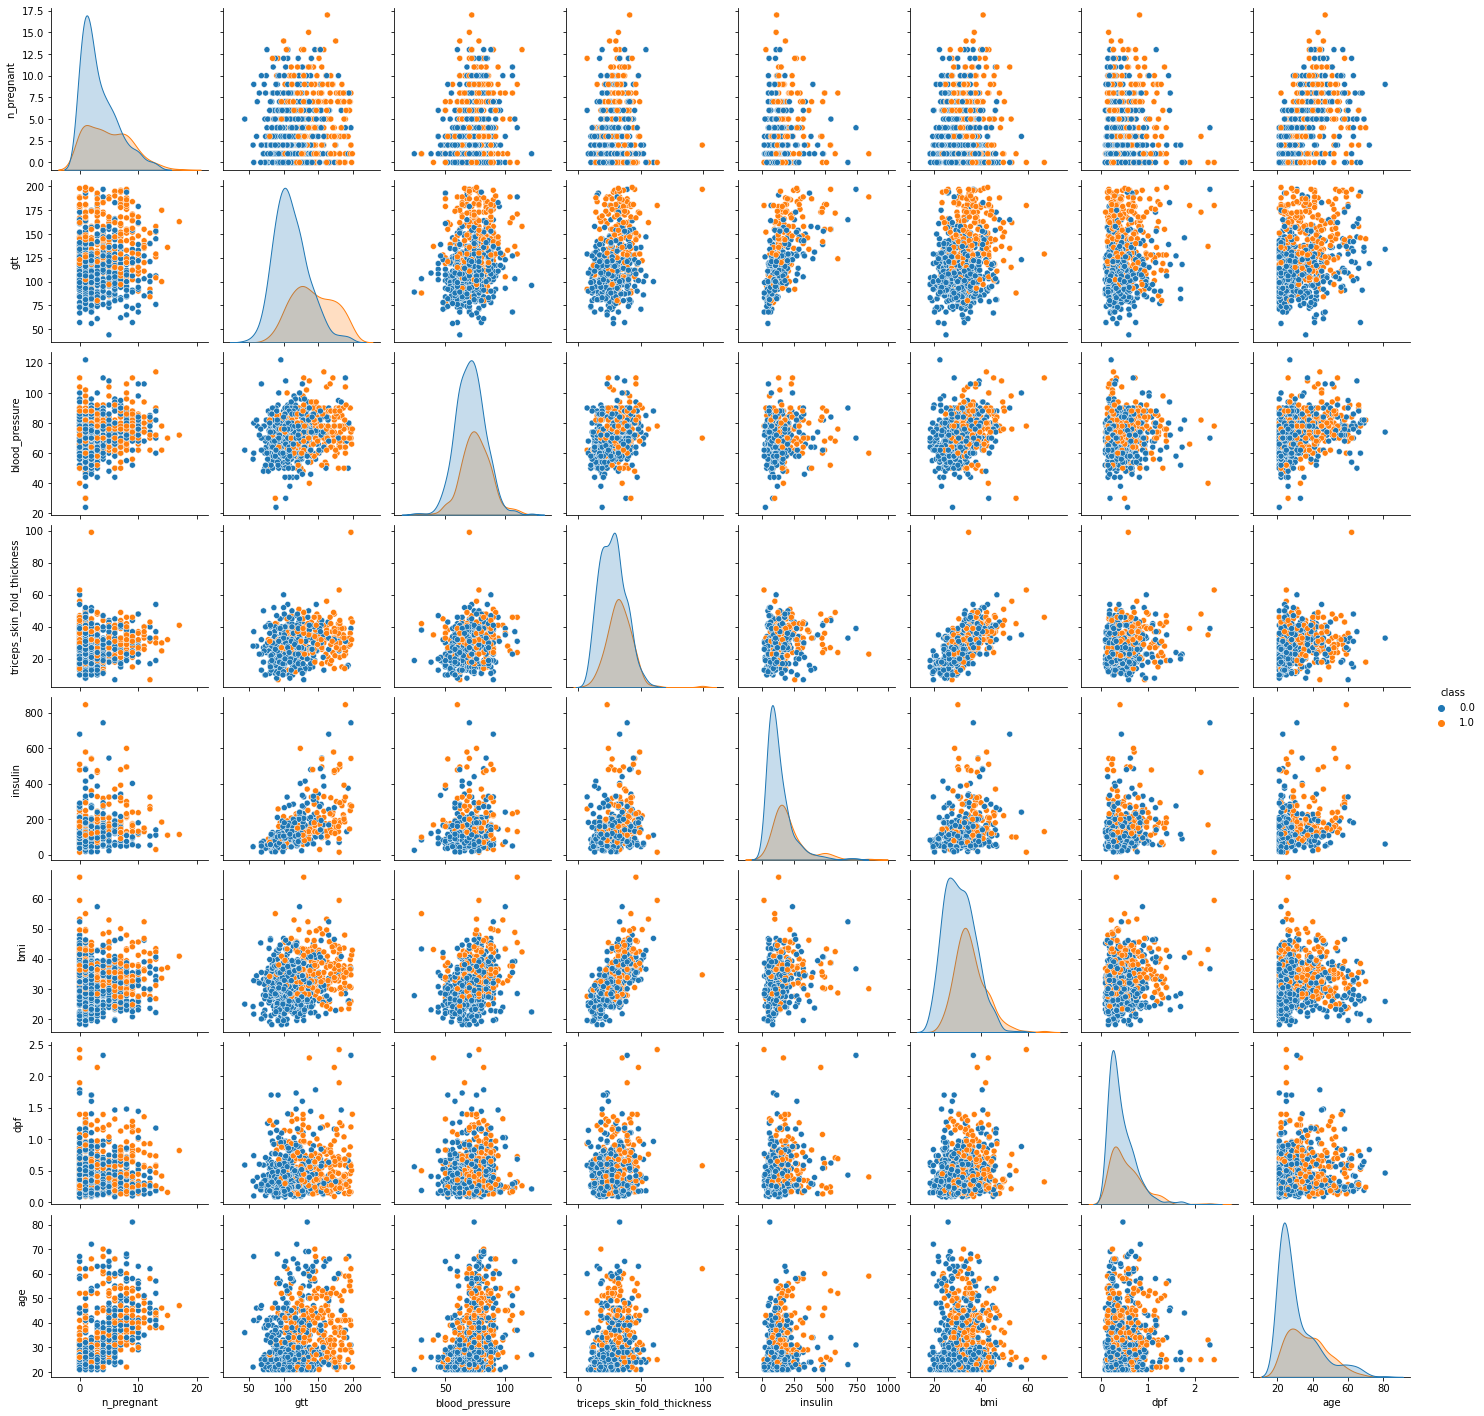

In [ ]:
sns.pairplot(df, hue="class")

<AxesSubplot:>

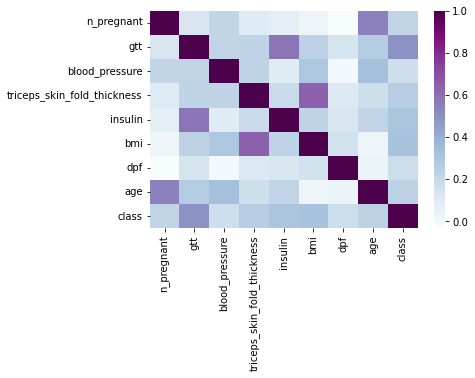

In [ ]:
sns.heatmap(df.corr(), cmap="BuPu")

In [ ]:
df.corr()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
n_pregnant,1.000000,0.127510,0.214267,0.099545,0.082171,0.021585,-0.033927,0.544018,0.221087
gtt,0.127510,1.000000,0.223345,0.227359,0.581186,0.232700,0.136805,0.266009,0.493950
blood_pressure,0.214267,0.223345,1.000000,0.226859,0.098272,0.289243,-0.002785,0.330618,0.170874
triceps_skin_fold_thickness,0.099545,0.227359,0.226859,1.000000,0.184888,0.648300,0.114698,0.165539,0.258582
insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
bmi,0.021585,0.232700,0.289243,0.648300,0.228050,1.000000,0.155305,0.025564,0.313773
dpf,-0.033927,0.136805,-0.002785,0.114698,0.130395,0.155305,1.000000,0.032738,0.173245
age,0.544018,0.266009,0.330618,0.165539,0.220261,0.025564,0.032738,1.000000,0.236417
class,0.221087,0.493950,0.170874,0.258582,0.303454,0.313773,0.173245,0.236417,1.000000


<AxesSubplot:xlabel='insulin', ylabel='gtt'>

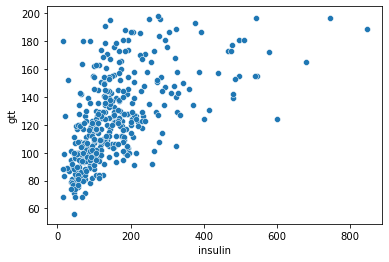

In [ ]:
sns.scatterplot(data=df, x="insulin", y="gtt")

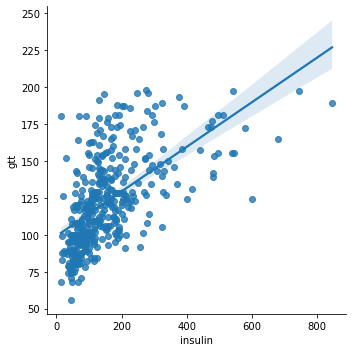

In [ ]:
sns.lmplot(data=df, x="insulin", y="gtt")

In [ ]:
for key, value in df.corr()['age'].items():
    print(key, value)

n_pregnant 0.5440181374395497
gtt 0.2660092468753813
blood_pressure 0.3306176947594477
triceps_skin_fold_thickness 0.16553940377164242
insulin 0.2202606847747703
bmi 0.02556420269157071
dpf 0.032738403869163886
age 1.0
class 0.23641745829787272


In [ ]:
# get a dictionary with the highest corellation between variables
dicti = {}
for name in df.columns:
    dicti[name] = {}
    for key, value in df.corr()[name].items():
        if value == 1:
            continue
        elif not dicti.get(name):
            dicti[name].update({key : value})
            temp = key
        elif value > dicti[name].get(temp):
            dicti[name] = {key : value}
            temp = key
pprint(dicti)

{'age': {'n_pregnant': 0.5440181374395497},
 'blood_pressure': {'age': 0.3306176947594477},
 'bmi': {'triceps_skin_fold_thickness': 0.6483004100232782},
 'class': {'gtt': 0.49395016664778196},
 'dpf': {'class': 0.17324535270149716},
 'gtt': {'insulin': 0.5811862089121647},
 'insulin': {'gtt': 0.5811862089121647},
 'n_pregnant': {'age': 0.5440181374395497},
 'triceps_skin_fold_thickness': {'bmi': 0.6483004100232782}}


In [ ]:
# print the highest corellation between variables
highest = {}
for key, value in dicti.items():
    if not highest:
        highest.update({key : value})
        name, subname, val = key, value.keys(), value.get(list(value.keys())[0])
    elif highest[name].get(list(subname)[0]) < value.get(list(value.keys())[0]):
        highest = {key : value}
        name, subname, val = key, value.keys(), value.get(list(value.keys())[0])
print(highest)

{'triceps_skin_fold_thickness': {'bmi': 0.6483004100232782}}


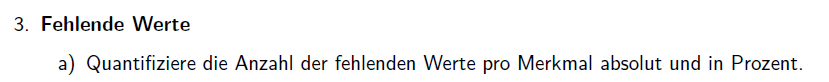

In [ ]:
df.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0.0


In [ ]:
print(df['n_pregnant'].isna().sum())
print(df.shape)

0
(767, 9)


In [34]:
nan_list = []
for name in df.columns:
    nan_list.append((name, df[name].isna().sum(), df[name].isna().sum() / df.shape[0]))
nan_list

[('n_pregnant', 0, 0.0),
 ('gtt', 5, 0.00651890482398957),
 ('blood_pressure', 35, 0.04563233376792699),
 ('triceps_skin_fold_thickness', 227, 0.29595827900912647),
 ('insulin', 373, 0.4863102998696219),
 ('bmi', 11, 0.014341590612777053),
 ('dpf', 0, 0.0),
 ('age', 0, 0.0),
 ('class', 0, 0.0)]

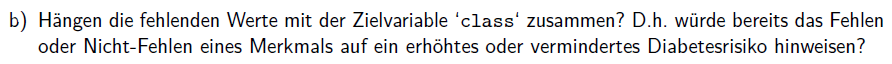

In [35]:
# Achte bei Zuweisungen, nutze .copy()
df_missing = df.copy()
df_missing = df_missing.drop("class", axis=1)
df_missing = df_missing.isna().astype(int)
df_missing["class"] = df["class"]
df_missing

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,0,0,0,0,1,0,0,0,0.0
1,0,0,0,1,1,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,1.0
4,0,0,0,1,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
762,0,0,0,0,0,0,0,0,0.0
763,0,0,0,0,1,0,0,0,0.0
764,0,0,0,0,0,0,0,0,0.0
765,0,0,0,1,1,0,0,0,1.0


In [36]:
# Wie viel 1er (d.h. fehlende Werte) pro Kategorie (class = {1, 0}) existieren
df_missing.groupby("class")[columns].agg([np.mean])*100

,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age
,mean,mean,mean,mean,mean,mean,mean
class,,,,,,,
0.0,0.600000,3.800000,27.800000,47.200000,1.800000,0.0,0.0
1.0,0.749064,5.992509,32.958801,51.310861,0.749064,0.0,0.0


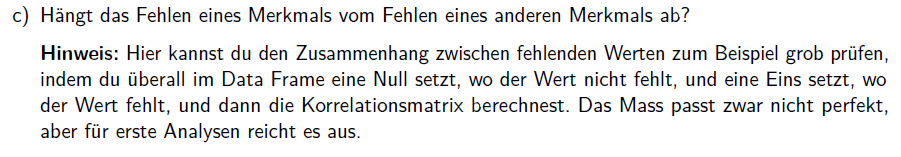

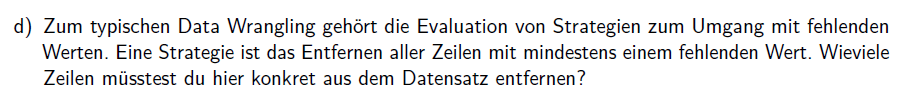

In [37]:
# d) min 373, max ?
print(df.isnull().sum())
print("Total Null values count: ",
      df.isnull().sum().sum())

n_pregnant                       0
gtt                              5
blood_pressure                  35
triceps_skin_fold_thickness    227
insulin                        373
bmi                             11
dpf                              0
age                              0
class                            0
dtype: int64
Total Null values count:  651


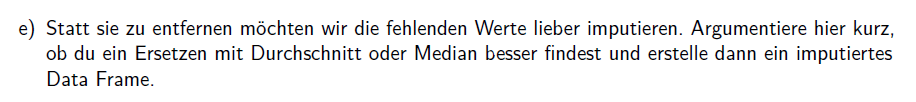

In [38]:
# imput, imputieren, imputation

In [39]:
# e) Mean imputation: use for symmetrical distributions of the data
df_mean_imp = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imp.iloc[:, :] = mean_imputer.fit_transform(df_mean_imp)

In [40]:
# e) Median imputation: use for non symmetrical distributions of the data
# Note: Use median as first choice if you're not sure
df_median_imp = df.copy(deep=True)
median_imputer = SimpleImputer(strategy='median')
df_median_imp.iloc[:, :] = median_imputer.fit_transform(df_median_imp)

In [41]:
# e) Mode imputation: use for categorical variable like color
df_mode_imp = df.copy(deep=True)
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode_imp.iloc[:, :] = mode_imputer.fit_transform(df_mode_imp)

In [42]:
# e) Constant imputation: depends on the usecase, e.g. missing revenue from companys: define a revenue class.
df_con_imp = df.copy(deep=True)
con_imputer = SimpleImputer(strategy='constant', fill_value=0)
df_con_imp.iloc[:, :] = con_imputer.fit_transform(df_con_imp)

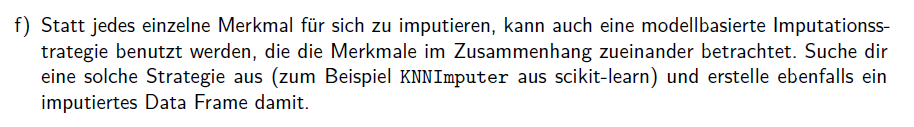

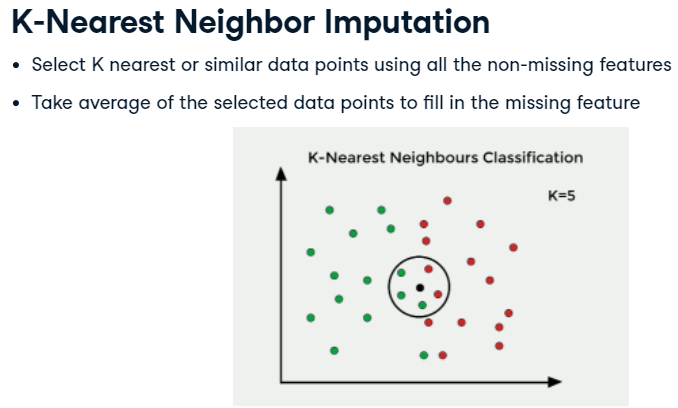

In [43]:
# f) K-Nearest Neighbor Imputation
knn_imputer = KNN()
df_knn = df.copy(deep=True) 
df_knn.iloc[:, :] = knn_imputer.fit_transform(df_knn)

Imputing row 1/767 with 1 missing, elapsed time: 0.124
Imputing row 101/767 with 2 missing, elapsed time: 0.127
Imputing row 201/767 with 2 missing, elapsed time: 0.130
Imputing row 301/767 with 0 missing, elapsed time: 0.132
Imputing row 401/767 with 2 missing, elapsed time: 0.134
Imputing row 501/767 with 1 missing, elapsed time: 0.137
Imputing row 601/767 with 3 missing, elapsed time: 0.139
Imputing row 701/767 with 1 missing, elapsed time: 0.141


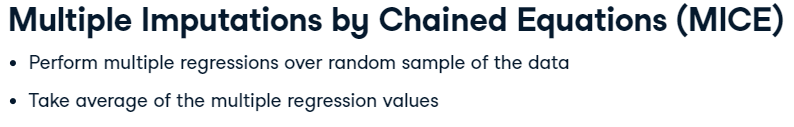

In [44]:
# f) Multiple Imputations by Chained Equations (MICE)
MICE_imputer = IterativeImputer()
df_MICE = df.copy(deep=True) 
df_MICE.iloc[:, :] = MICE_imputer.fit_transform(df_MICE)

# !!!!!!!Bestimmtheitsmass ausrechnen mit skit.learn!!!!!!!!!

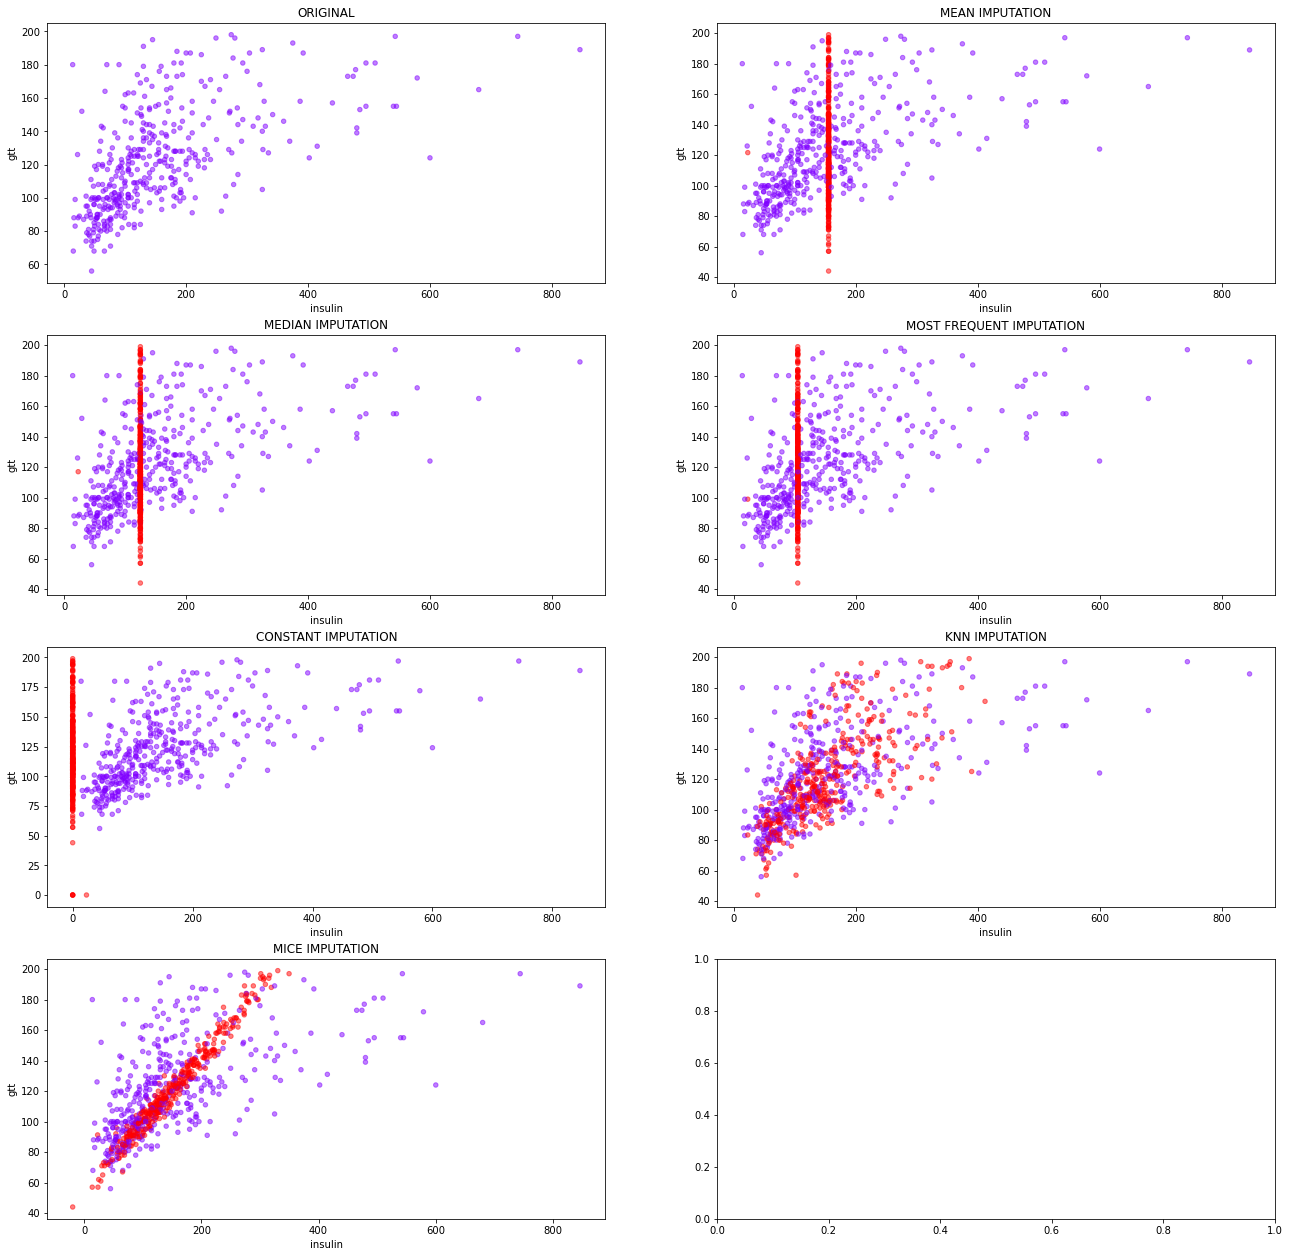

In [45]:
# Visualizing imputations
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 22))
nullity = df["insulin"].isnull()+df["gtt"].isnull()
imputations = {
    "ORIGINAL": df,
    "MEAN IMPUTATION": df_mean_imp,
    "MEDIAN IMPUTATION": df_median_imp,
    "MOST FREQUENT IMPUTATION": df_mode_imp,
    "CONSTANT IMPUTATION": df_con_imp,
    "KNN IMPUTATION": df_knn,
    "MICE IMPUTATION": df_MICE
}
for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x="insulin", y="gtt", kind="scatter", alpha=0.5, c=nullity, cmap="rainbow", ax=ax, colorbar=False, title=df_key)

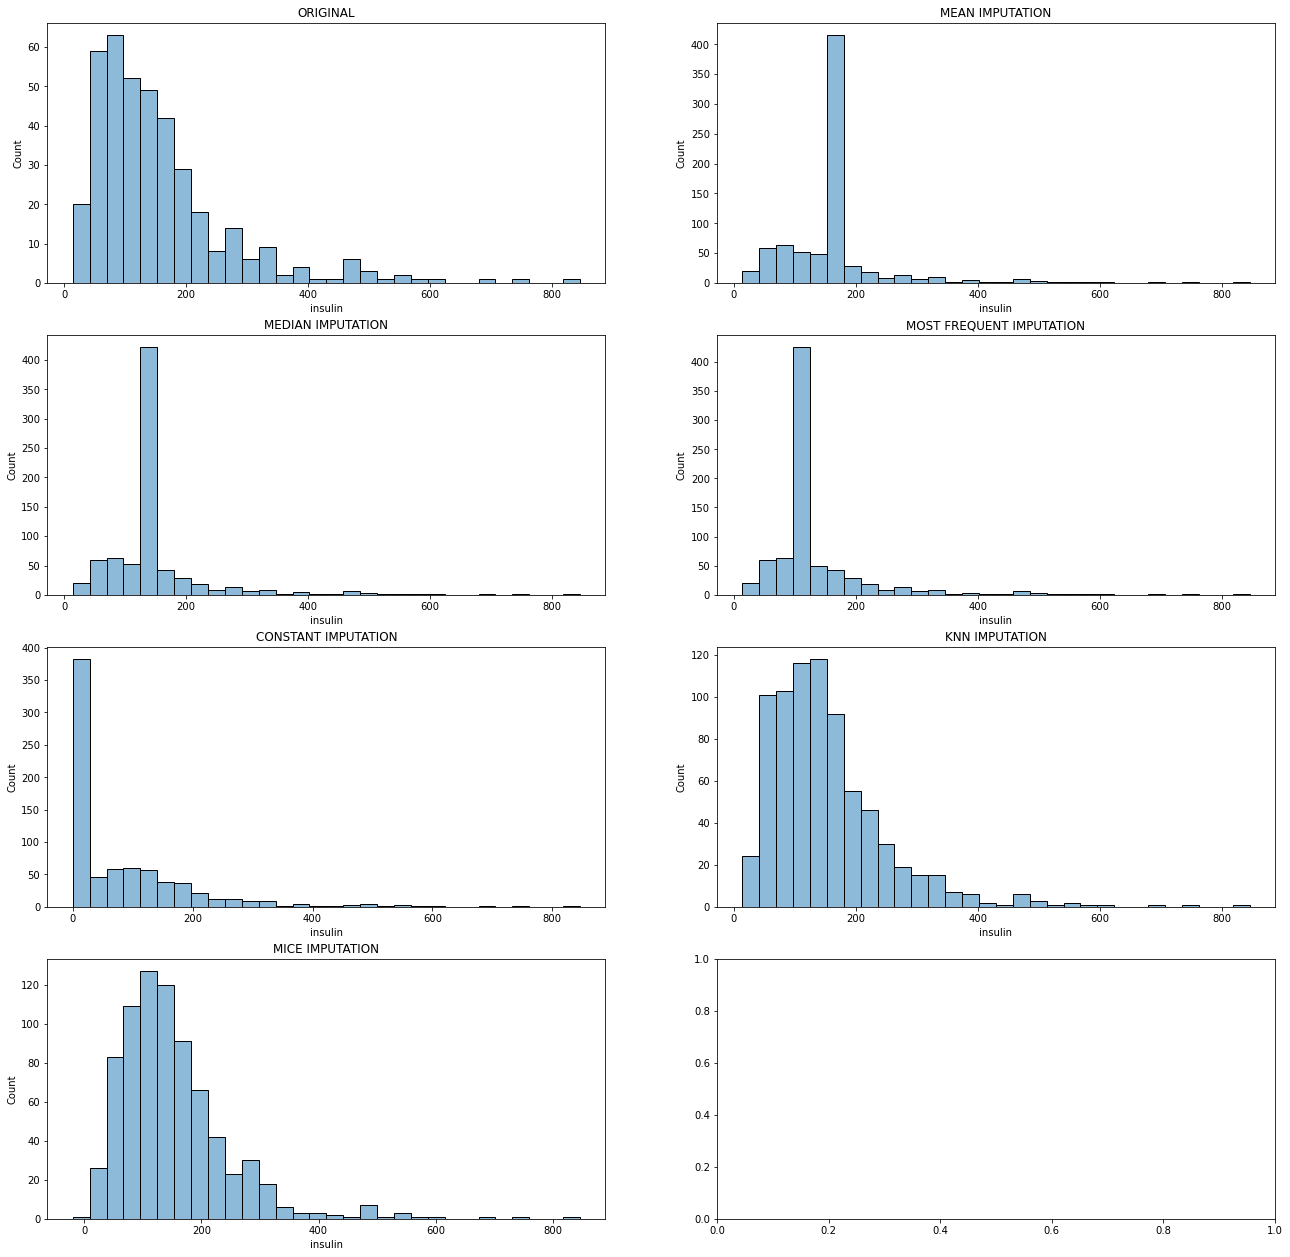

In [46]:
# Visualizing the distribution of the data after imputation
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 22))
imputations = {
    "ORIGINAL": df,
    "MEAN IMPUTATION": df_mean_imp,
    "MEDIAN IMPUTATION": df_median_imp,
    "MOST FREQUENT IMPUTATION": df_mode_imp,
    "CONSTANT IMPUTATION": df_con_imp,
    "KNN IMPUTATION": df_knn,
    "MICE IMPUTATION": df_MICE
}
for ax, df_key in zip(axes.flatten(), imputations):
    sns.histplot(data=imputations[df_key], x="insulin", ax=ax, alpha=0.5, bins=30).set_title(df_key)

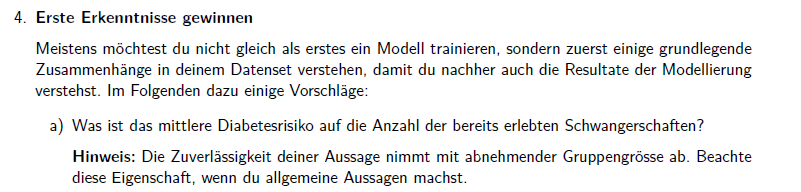

In [47]:
# pro Anzahl Schwangerschaften mean berechnen, Anzahl gegenüberstellen, line plot
df_4a = df.copy()
class_1_n_pregnant_not_zero = df[(df["n_pregnant"] > 0) & (df["class"] == 1)].count()
N = df.shape[0]
df_4a["diabetes_pregnant"] = class_1_n_pregnant_not_zero["n_pregnant"] / df.shape[0]
mean_diab_preg = class_1_n_pregnant_not_zero["n_pregnant"] / N
display(mean_diab_preg)
display(df_4a.head())

0.2985658409387223

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,diabetes_pregnant
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,0.298566
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,0.298566
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.298566
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,0.298566
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0.0,0.298566


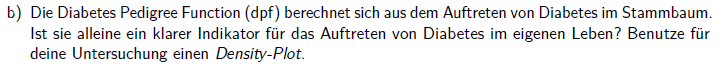

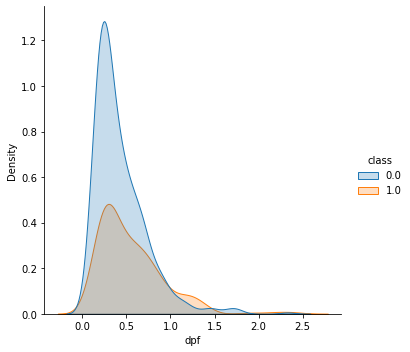

In [48]:
# daten prüfen
sns.displot(data = df, x = "dpf", hue="class", kind="kde", fill=True)

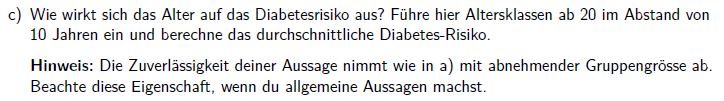

In [49]:
df.groupby(pd.cut(df["age"], np.arange(20, 80, 10)))["class"].agg([np.mean])

,mean
age,
"(20, 30]",0.215827
"(30, 40]",0.484076
"(40, 50]",0.562500
"(50, 60]",0.574074
"(60, 70]",0.280000


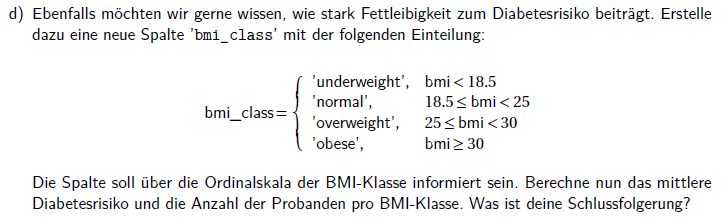

In [50]:
df_4d = df.copy()
bins = [0, 18.5, 25, 30, 200]
labels = ["underweight", "normal", "overweight", "obese"]
df_4d["bmi_class"] = pd.cut(df_4d["bmi"], bins=bins, labels=labels)
display(df_4d.head())
df_4d.info()
display(df_4d["bmi"].agg([np.max, np.min, np.mean, np.median]))
display("number of classes not defined: {}".format(pd.isnull(df_4d["bmi_class"].values).sum()))

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class,bmi_class
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0.0,overweight
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1.0,normal
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,overweight
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,obese
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0.0,overweight


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   n_pregnant                   767 non-null    float64 
 1   gtt                          762 non-null    float64 
 2   blood_pressure               732 non-null    float64 
 3   triceps_skin_fold_thickness  540 non-null    float64 
 4   insulin                      394 non-null    float64 
 5   bmi                          756 non-null    float64 
 6   dpf                          767 non-null    float64 
 7   age                          767 non-null    float64 
 8   class                        767 non-null    float64 
 9   bmi_class                    756 non-null    category
dtypes: category(1), float64(9)
memory usage: 55.0 KB


amax      67.100000
amin      18.200000
mean      32.455952
median    32.300000
Name: bmi, dtype: float64

'number of classes not defined: 11'

In [52]:
# rel. Verteilung der Gesamtanzahl
# display(df_4d.groupby("bmi_class")["class"].agg([np.mean, np.sum]))
# display(df_4d.groupby("bmi_class").size())
# df_4d["bmi_class_rel"] = df[df["bmi_class"].size()] / df_4d[0]

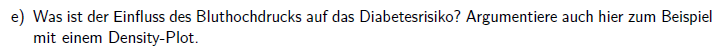

# FOR REPETITION

In [53]:
import matplotlib.pyplot as plt
import numpy as np
df_rep = pd.read_excel("diabetes.xlsx", sheet_name="data")
df_rep.head()

,Datensatz:,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [54]:
head = df_rep.iloc[1].values
body = df_rep.iloc[2:].values
df_rep = pd.DataFrame(data=body, columns=head)
df_rep.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [55]:
# fill zero values with nan
columns = df_rep.columns.to_list()
columns = [x for x in columns if x != "class" if x != "n_pregnant"]
df_rep[columns] = df_rep[columns].replace({0:np.nan})
df_rep.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [56]:
# .pivot_table()
pregnancy_by_class = df_rep.pivot_table(
    values="n_pregnant", 
    index="class", 
    aggfunc=[np.mean, np.median, np.max, np.min])
pregnancy_by_class.head()

,mean,median,amax,amin
,n_pregnant,n_pregnant,n_pregnant,n_pregnant
class,,,,
0,3.298000,2.0,13,0
1,4.861423,4.0,17,0


<AxesSubplot:xlabel='class', ylabel="('median', 'n_pregnant')">

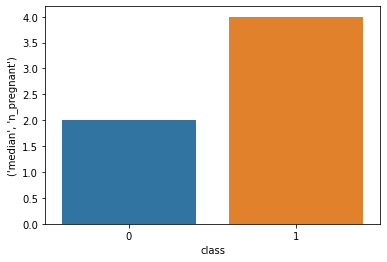

In [57]:
sns.barplot(data=pregnancy_by_class, x=pregnancy_by_class.index, y=pregnancy_by_class.columns.values[1])

In [58]:
# .pivot_table()
gtt_by_age = df_rep.pivot_table(
    values="gtt", 
    index="age", aggfunc=[np.mean, np.median, np.max, np.min]) 
    #margins=True)
gtt_by_age.head()

,mean,median,amax,amin
,gtt,gtt,gtt,gtt
age,,,,
21,110.064516,108.0,177.0,71.0
22,111.300000,104.5,199.0,56.0
23,111.578947,108.0,179.0,68.0
24,117.891304,112.0,193.0,77.0
25,110.083333,103.0,193.0,68.0


In [59]:
print(gtt_by_age.columns.values)
print(gtt_by_age.index)

[('mean', 'gtt') ('median', 'gtt') ('amax', 'gtt') ('amin', 'gtt')]
Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
            81],
           dtype='int64', name='age')


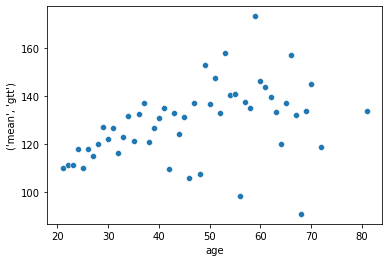

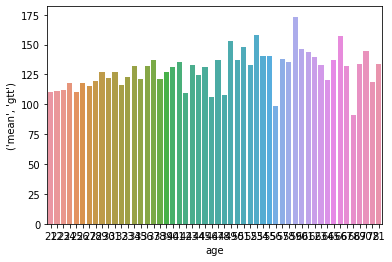

In [60]:
sns.scatterplot(data=gtt_by_age, x=gtt_by_age.index, y=gtt_by_age.columns.values[0])
plt.show()
sns.barplot(data=gtt_by_age, x=gtt_by_age.index, y=gtt_by_age.columns.values[0])
plt.show()

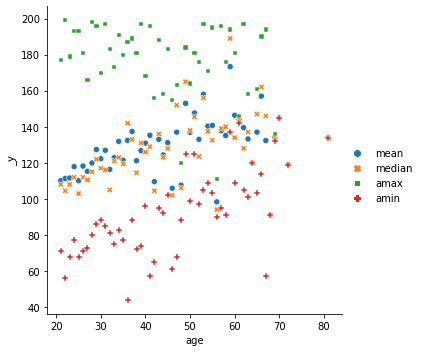

In [61]:
sns.relplot(data=gtt_by_age, kind="scatter")

In [62]:
df_rep.head()

,n_pregnant,gtt,blood_pressure,triceps_skin_fold_thickness,insulin,bmi,dpf,age,class
0,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
1,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
2,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [63]:
# .pivot_table(), insulin by age
insulin_by_age = df_rep.pivot_table(
    values="insulin", 
    index="age", 
    aggfunc=[np.mean, np.median, np.max, np.min], 
    fill_value=np.nan)
insulin_by_age.head()

,mean,median,amax,amin
,insulin,insulin,insulin,insulin
age,,,,
21,132.542857,89.0,480,18
22,124.720930,90.0,474,16
23,160.178571,108.0,680,15
24,130.612903,120.0,387,36
25,132.633333,100.0,540,14


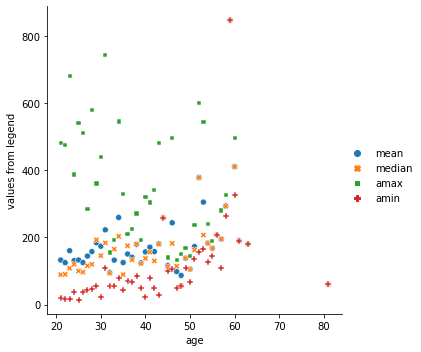

In [64]:
# summarized insulin_by_age data frame
sns.relplot(data=insulin_by_age, kind="scatter").set_axis_labels("age", "values from legend")

# NUMPY AGGREGATION FUNCTIONS

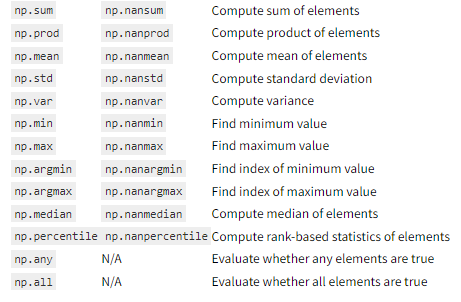

# REPETITION 03.05.22

# LÖSE PROBEPRÜFUNG HS21 AUFGABE G)